# Write a blog post Data Science Udacity - Seattle AirBnB 
## Kim Dressendörfer

This project, creates a deeper look into the Seattle AirBnB dataset from Kaggle to see if certain trends could be pulled from the information collected by AirBnB. 

### Questions:

1. Which neighborhood is the most expensive and which is the cheapest?
2. How do customer reviews factor into the AirBnB? Are there more comments for highly or poorly rated AirBnBs?
3. What factors determine rating? Can we predict rating using a model?

### Data Understanding<a id='dataunderstanding'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Calendar contains dates, availability, and prices. Listings contains information about the posts themselves, such as review scores, neighborhoods, etc. Reviews holds the customer review information. All three contain listing_id in common.

In [5]:
print('listings: '+ str(listings.shape))
print('calendar: '+ str(calendar.shape))
print('reviews: '+ str(reviews.shape))

listings: (3818, 92)
calendar: (1393570, 4)
reviews: (84849, 6)


From this, we can gather that listings contains the most columns, and therefore, the most relevant information needed to answer our questions. Let's explore what these columns are.

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

So clearly, there are some null values in this dataset that we may have to fix. Even more strangely, there is a column with ONLY null objects (license). This one can be deleted. In the data preparation step, we will drop columns that exhibit drop-worthy characteristics as well.

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [9]:
#check missing values in review_scores_rating column
listings.review_scores_rating.isnull().sum()

647

In [10]:
listings.experiences_offered.value_counts()

none    3818
Name: experiences_offered, dtype: int64

In [11]:
listings.requires_license.value_counts()

f    3818
Name: requires_license, dtype: int64

In [12]:
listings.jurisdiction_names.value_counts()

WASHINGTON    3818
Name: jurisdiction_names, dtype: int64

With this analysis, we can move forward with the data preparation step. Listings contains some columns that do not contain any useful information, which can be dropped. The quantitative columns need to be adjusted in order to create a predictive model for rating. Reviews can be cleaned up as well so we can see if comments tend to be for good stays or bad ones. 

### Data Preparation<a id='datapreparation'></a>

For the general cleaning, we can delete these types of columns:
1. Columns that are entirely NaN
2. Columns that only contain 1 unique non-NaN value
3. Columns that have a high number of NaN values that won't affect our analysis
4. Columns that contain irrelevant quantitative or qualitative information

#### Step 1: NaN Column

In [13]:
listings.drop(columns=['license'],inplace=True)
#listings.drop(['license','requires_license','experiences_offered','jurisdiction_names'], axis=1, inplace=True)
#listings.head()

#### Step 2: Non unique columns
First, we need to determine which columns contain only 1 non-NaN value

In [14]:
x = listings.nunique()==1
#print(x)
x[x == True]

scrape_id                True
last_scraped             True
experiences_offered      True
market                   True
country_code             True
country                  True
has_availability         True
calendar_last_scraped    True
requires_license         True
jurisdiction_names       True
dtype: bool

In [15]:
listings.state.unique()

array(['WA', 'wa'], dtype=object)

We can proceed to drop these columns, including state, because it looks like it was an entry difference rather than a value difference that contributed to its uniqueness.

In [16]:
listings.drop(['scrape_id', 'last_scraped', 'experiences_offered','market','country_code',
                         'country','has_availability','calendar_last_scraped','requires_license','jurisdiction_names','state'],
                axis=1,
                inplace = True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   name                              3818 non-null   object 
 3   summary                           3641 non-null   object 
 4   space                             3249 non-null   object 
 5   description                       3818 non-null   object 
 6   neighborhood_overview             2786 non-null   object 
 7   notes                             2212 non-null   object 
 8   transit                           2884 non-null   object 
 9   thumbnail_url                     3498 non-null   object 
 10  medium_url                        3498 non-null   object 
 11  picture_url                       3818 non-null   object 
 12  xl_pic

#### Step 3: High NaN Percentage

First, we will attempt to put a limit on how many null values a column needs to have in order to consider dropping it. I propose that any column with more than 25% null values should be dropped. Let's identify these columns.

In [17]:
over_25 = [cat for cat in listings.columns.values if (listings[cat].isna().sum()/len(listings))>=0.25]
over_25

['neighborhood_overview',
 'notes',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee']

In [18]:
listings.drop(over_25,
                axis=1,
                inplace = True)

In [19]:
[cat for cat in listings.columns.values if (listings[cat].isna().sum()/len(listings))>=0.25]

[]

In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   name                              3818 non-null   object 
 3   summary                           3641 non-null   object 
 4   space                             3249 non-null   object 
 5   description                       3818 non-null   object 
 6   transit                           2884 non-null   object 
 7   thumbnail_url                     3498 non-null   object 
 8   medium_url                        3498 non-null   object 
 9   picture_url                       3818 non-null   object 
 10  xl_picture_url                    3498 non-null   object 
 11  host_id                           3818 non-null   int64  
 12  host_u

#### Step 4: Irrelevant columns
Finally, we can remove columns that don't pertain to our analysis:
I will remove any columns that contain url because they won't contribute anything to answering my questions

In [21]:
listings.drop(listings.filter(regex='url').columns, axis=1, inplace = True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   summary                           3641 non-null   object 
 3   space                             3249 non-null   object 
 4   description                       3818 non-null   object 
 5   transit                           2884 non-null   object 
 6   host_id                           3818 non-null   int64  
 7   host_name                         3816 non-null   object 
 8   host_since                        3816 non-null   object 
 9   host_location                     3810 non-null   object 
 10  host_about                        2959 non-null   object 
 11  host_response_time                3295 non-null   object 
 12  host_r

Now that the data is generally cleaned, it can be modified for the questions posed.

#### Question 1: Which neighborhood is the most expensive and which is the cheapest?
The first step to take would be grouping price and neighborhood. I decided to use the neighborhood_cleansed column because it specifies the neighborhoods in a clear yet specific way. Before grouping these two categories, the price column needs to be converted from object to float and the $ sign must be removed.

In [22]:
#Remove $ from price column
listings['price'].replace('[\$,]', '', regex=True, inplace = True)
listings.price.head()

0     85.00
1    150.00
2    975.00
3    100.00
4    450.00
Name: price, dtype: object

In [23]:
#Convert price from object (string) to float
listings.price = listings.price.astype(float)
listings.price.dtypes

dtype('float64')

The average price per neighborhood is how the neighborhoods will be grouped

In [24]:
price_neighborhood = listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
print(price_neighborhood)

                             price
neighbourhood_cleansed            
Southeast Magnolia      231.705882
Portage Bay             227.857143
Westlake                194.470588
West Queen Anne         187.769231
Montlake                182.789474
...                            ...
North Delridge           76.375000
Georgetown               76.125000
South Delridge           74.666667
Olympic Hills            71.687500
Rainier Beach            68.555556

[87 rows x 1 columns]


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text xticklabel objects>)

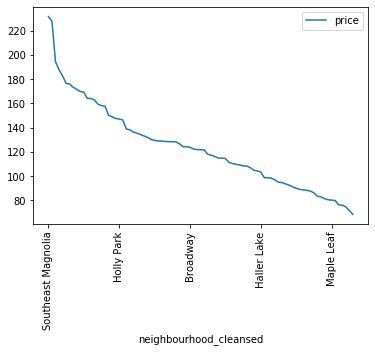

In [25]:
price_neighborhood.plot()
plt.xticks(rotation=90)

So it looks like the 3 most expensive neighborhoods are Southeast Magnolia, Portage Bay and Westlake. The three cheapest neighborhoods are Rainier Beach, Olympic Hills, and South Delridge. When the average neighborhood prices are plotted, we can see a slight decay-like curve that levels out to a more linear plot price-wise with the individual neighborhoods. However, how does price differ by the larger neighborhood groups?

In [26]:
price_group = listings.groupby(['neighbourhood_group_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
print(price_group)

                                   price
neighbourhood_group_cleansed            
Magnolia                      177.672131
Queen Anne                    157.223729
Downtown                      154.405660
West Seattle                  141.359606
Cascade                       140.101124
Capitol Hill                  130.592593
Central Area                  128.338753
Ballard                       124.682609
Other neighborhoods           119.968514
Interbay                      109.727273
Seward Park                   108.477273
Beacon Hill                    94.669492
University District            93.639344
Lake City                      92.671642
Rainier Valley                 91.899371
Northgate                      88.550000
Delridge                       83.278481


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 11 Text xticklabel objects>)

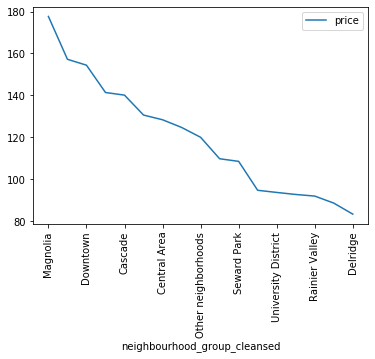

In [27]:
price_group.plot()
plt.xticks(rotation=90)

When the neighborhood groups are analyzed, we see some of the top and bottom neighborhoods switched around; the top 3, Magnolia, Queen Anne, and Downtown, introduce the Queen Anne neighborhood group as a more pricy area to stay. The bottom 3, Delridge, Northgate, and Rainier Valley, brings in Northgate as a new contender, while Rainier Valley moves up even though it contains the average cheapest single neighborhood of Rainier Beach. The plot looks a lot more linear, as averaging many neighborhoods lessens the difference seen between them.

#### Takeaway
Most expensive neighborhoods (individual):
1. Southeast Magnolia - 231.70
2. Portage - 227.86
3. Westlake - 194.47

Cheapest neighborhoods (individual):
1. Rainier Beach - 68.56
2. Olympic Hills - 71.69
3. South Delridge - 74.67

#### Question 2: How do customer reviews factor into the AirBnB? Are there more comments for highly or poorly rated AirBnBs?
The idea behind leaving a review is to let the host know if there is something notable about their AirBnB, or to warn future clients. This question seeks if leaving a comment is associated with the rating left. The first step would be to create a separate dataframe by using the id from a rating in the listings dataframe and finding the number of comments corresponding to that listing in the reviews dataframe. We have to first remove all of the rows with a NaN rating in listings

In [28]:
#First drop all of the rows with a NaN value for overall rating
listings.dropna(subset=['review_scores_rating'],inplace = True)
listings.review_scores_rating.isna().sum()

0

In [29]:
#Drop all rows with NaN comments because there are only 18
reviews.dropna(subset=['comments'], inplace = True)
reviews.comments.isna().sum()

0

Now we can define a function to get the number of comments from an id corresponding to a certain rating

In [30]:
#This function counts the number of comments from the reviews datafram associated with a certain id from the listings dataframe. 
#This can be used to create a separate dataframe for every rating with its number of comments
def get_comment(id_num):
    '''
    Function uses listing id and returns the associated from the listings data set
    INPUT:
    id_num:  listing id for an AirBnB
    OUTPUT:
    comment_num: number of comments associated with that listing
    
    '''
    #comment_num = (reviews.loc[reviews['listing_id'] == id_num, 'comments'].iloc[0] != pd.np.nan).sum()
        
    comment_num = (reviews.loc[reviews['listing_id'] == id_num, 'comments']).count()
    return comment_num

#test to see if function works correctly
get_comment(241032),get_comment(7202016)

(207, 16)

In [31]:
#Create new dataframe with id and ratings from listings
comment_rating = listings[['id','review_scores_rating']]

#Rename bulky column title to 'rating'
comment_rating.rename(columns={"review_scores_rating": "rating"}, inplace = True)
comment_rating.head()

/Users/kimdressendoerfer/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,rating
0,241032,95.0
1,953595,96.0
2,3308979,97.0
4,278830,92.0
5,5956968,95.0


In [32]:
#Apply the get_comment function to each id in comment_rating to create a new column with total comment number for each id
comment_rating['num_comments'] = comment_rating['id'].apply(get_comment)
comment_rating.head(10)

/Users/kimdressendoerfer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,rating,num_comments
0,241032,95.0,207
1,953595,96.0,43
2,3308979,97.0,20
4,278830,92.0,38
5,5956968,95.0,17
6,1909058,99.0,58
7,856550,97.0,173
8,4948745,97.0,8
9,2493658,97.0,32
10,175576,97.0,181


In [33]:
#Get a general view of ratings sorted from lowest to highest
comment_rating.sort_values(by=['rating'])

,id,rating,num_comments
1222,9183838,20.0,1
3148,5639238,40.0,2
2320,8474294,40.0,1
1162,9151865,40.0,1
1666,9151374,40.0,3
...,...,...,...
2014,7674720,100.0,2
2000,9908591,100.0,2
1999,6926511,100.0,7
2029,4567243,100.0,2


Text(0, 0.5, 'Number of Comments')

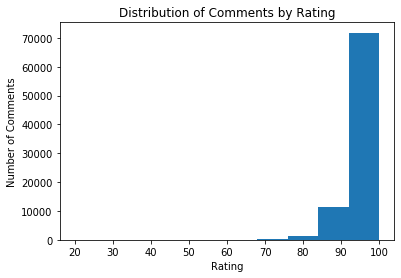

In [34]:
#Plot histogram of number of comments against ratings as bins
from matplotlib.pyplot import hist
hist(comment_rating.rating, weights=comment_rating.num_comments)
plt.title("Distribution of Comments by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Comments")

From this histogram, it looks as if there is a heavy left skew; the higher rank numbers tend to have more reviews. This might lead one to assume that better ranking AirBnBs will have more comments, but since this dataset is relatively small (n~3000), it would be prudent to gather more data to perform this analysis and see if this trend is repeatable.

#### Question 3: What factors contribute to the overall rating? Can we predict rating using a model?
Create new dataframe with quant cols and cols that can become dummies (amenities, etc.)

In [35]:
# Split the data into features and target label
target = listings['review_scores_rating']
features = listings.drop('review_scores_rating', axis = 1)

In [36]:
features.drop(columns='id',inplace=True)

Now columns that don't seem to affect the price can be dropped. Some of the host data can be dropped because the data seems messy and processing it will likely not lead to any meaningful contribution to price.

In [37]:
#drop some host variables
host_cols = ['host_id','host_name','host_since','host_location','host_about','host_verifications']
features.drop(host_cols, axis = 1, inplace = True)
features.head()
#host_id, host_name, host_since, host_location, host_about, host_verifications

,name,summary,space,description,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,100%,f,Queen Anne,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Convenient bus stops are just down the block, ...",within an hour,98%,100%,t,Queen Anne,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,A bus stop is just 2 blocks away. Easy bus a...,within a few hours,67%,100%,f,Queen Anne,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,The nearest public transit bus (D Line) is 2 b...,within an hour,100%,NaN,f,Queen Anne,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
5,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,The #1 and #2 bus picks up 2-3 blocks away (di...,NaN,NaN,NaN,f,Queen Anne,...,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45


In [38]:
features.host_acceptance_rate.describe()

count     2694
unique       2
top       100%
freq      2693
Name: host_acceptance_rate, dtype: object

host_acceptance_rate appears to contain mostly 100% as a value, so we can drop this column as well

In [39]:
features.drop(['host_acceptance_rate'], axis = 1, inplace = True)
features.head()

,name,summary,space,description,transit,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,f,Queen Anne,3.0,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Convenient bus stops are just down the block, ...",within an hour,98%,t,Queen Anne,6.0,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,A bus stop is just 2 blocks away. Easy bus a...,within a few hours,67%,f,Queen Anne,2.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,The nearest public transit bus (D Line) is 2 b...,within an hour,100%,f,Queen Anne,2.0,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
5,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,The #1 and #2 bus picks up 2-3 blocks away (di...,NaN,NaN,f,Queen Anne,1.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45


The next step would be to drop some more irrelevant data, mostly pertaining to location, which is redundant considering that all of these AirBnBs are in Seattle. Some more precise data, like latitude and longitude, are too detailed for this analysis as well. Along with that, we can drop first_review, last_review, and calendar_updated.

In [40]:
#drop redundant neighborhood BUT KEEP NEIGHBOURHOOD_GROUP_CLEANSED
loc_cols = ['neighbourhood','neighbourhood_cleansed','city','street','smart_location','latitude','longitude','zipcode','first_review','last_review','calendar_updated']
features.drop(loc_cols, axis = 1, inplace = True)
features.head()

,name,summary,space,description,transit,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,f,Queen Anne,3.0,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Convenient bus stops are just down the block, ...",within an hour,98%,t,Queen Anne,6.0,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,A bus stop is just 2 blocks away. Easy bus a...,within a few hours,67%,f,Queen Anne,2.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,The nearest public transit bus (D Line) is 2 b...,within an hour,100%,f,Queen Anne,2.0,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
5,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,The #1 and #2 bus picks up 2-3 blocks away (di...,NaN,NaN,f,Queen Anne,1.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45


Now we can move on to modifying categorical variables so that they can be included in the modeling

In [41]:
list(features.select_dtypes(include='object'))

['name',
 'summary',
 'space',
 'description',
 'transit',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'extra_people',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

There are some object type variables that should be numerical; host_response_time and host_response_rate can be converted

In [42]:
features.host_response_rate.unique()

array(['96%', '98%', '67%', '100%', nan, '71%', '97%', '60%', '50%',
       '31%', '70%', '90%', '88%', '80%', '63%', '33%', '99%', '75%',
       '83%', '94%', '58%', '43%', '93%', '92%', '40%', '57%', '89%',
       '95%', '81%', '91%', '78%', '38%', '86%', '30%', '56%', '76%',
       '64%', '82%', '17%', '87%', '25%', '69%', '53%', '65%'],
      dtype=object)

String variables that need to be converted to floats:
- host_response_rate
- extra_people
host_response_time needs to be handled with dummy variables as the entries aren't numerical in nature

In [43]:
#Strip '%' from rates and convert to float
features['host_response_rate'].replace('%', '', regex=True, inplace = True)
features['host_response_rate'] = features['host_response_rate'].astype(float)

#Divide by 100 to get response rate as a fraction
features['host_response_rate']=features['host_response_rate']/100
features['host_response_rate'].head()

0    0.96
1    0.98
2    0.67
4    1.00
5     NaN
Name: host_response_rate, dtype: float64

In [44]:
#Strip dollar sign from extra_people and convert to float as well
features['extra_people'].replace('[\$,]', '', regex=True, inplace = True)
features['extra_people'] = features['extra_people'].astype(float)

features.extra_people.head()

0     5.0
1     0.0
2    25.0
4    15.0
5    30.0
Name: extra_people, dtype: float64

#### Boolean variables:
- host_is_superhost
- host_has_profile_pic
- host_identity_verified
- is_location_exact
- instant_bookable
- require_guest_profile_picture
- require_guest_phone_verification

#### Categorical variables (need dummies):
- name
- summary
- space
- description
- transit
- host_response_time
- host_neighbourhood
- neighbourhood_cleansed
- property_type
- room_type
- bed_type
- amenities
- cancellation_policy

We can convert the 't/f' values for the boolean type variables into 1s and 0s so that they can be used in our calculation.

In [45]:
bool_vals = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
features[bool_vals] = np.where(features[bool_vals]=='t', 1, 0)
features[bool_vals].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0,1,1,1,0,0,0
1,1,1,1,1,0,1,1
2,0,1,1,1,0,0,0
4,0,1,1,1,0,0,0
5,0,1,1,1,0,0,0


The binary values have been set, but some of our string variables can also be made into boolean values. 
- name
- summary
- space
- description
- transit

These will all become boolean 1/0 to indicate whether there is a text entry in this field

In [46]:
# Function to convert text/descriptive columns to 1/0
def bool_text(text):
    '''
    Function to convert text/descriptive columns to 1/0
    INPUT:
    text - String that needs to be converted to 1/0
    OUTPUT:
    0 or 1 - Returns 0 if no text passed, 1 if there is text
    
    Checks if text data exists and assigns value based on existence
    '''
    if not text:
        return 0
    else:
        return 1

In [47]:
text_cols = ['name','summary','space','description','transit']
for col in text_cols:
    features[col] = features[col].apply(bool_text)
features[text_cols].head()

,name,summary,space,description,transit
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
4,1,1,1,1,1
5,1,1,1,1,1


Now that some of the categorical values are handled with Boolean values, we can move on to the more complex variables. I will drop host_neighbourhood because this value likely has little impact on rating calculation.

In [48]:
features.drop(['host_neighbourhood'],axis = 1, inplace = True)

In [49]:
#Examine the spread of unique values in each categorical variable
cat_cols = ['host_response_time',
'neighbourhood_group_cleansed',
'property_type',
'room_type',
'bed_type',
'amenities',
'cancellation_policy']
#features[cat_cols].describe()
features[cat_cols].describe()

,host_response_time,neighbourhood_group_cleansed,property_type,room_type,bed_type,amenities,cancellation_policy
count,2859,3171,3171,3171,3171,3171,3171
unique,4,17,16,3,5,2733,3
top,within an hour,Other neighborhoods,House,Entire home/apt,Real Bed,{},strict
freq,1521,656,1460,2125,3043,23,1257


Amenities seems to be the bulkiest variable that we need to process, so we will start with that before moving on to the other 6 variables. The clearest solution seems to be to separate amenities into its own dataframe to clean it up and then merge it back with the features dataframe

In [50]:
amenities = features['amenities'].str.split(',',expand=True)
amenities.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},...,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),...,Shampoo},None,None,None,None,None,None,None,None,None
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""",...,None,None,None,None,None,None,None,None,None,None
5,"{""Wireless Internet""","""Free Parking on Premises""",Heating,"""Smoke Detector""",Essentials,Shampoo},None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [51]:
#Remove quotes, brackets, etc. from amenities
amenities.replace('[^\w\s]','', regex=True, inplace = True)
amenities.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,FamilyKid Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,BuzzerWireless Intercom,Heating,FamilyKid Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dogs,...,Shampoo,None,None,None,None,None,None,None,None,None
4,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,FamilyKid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,...,None,None,None,None,None,None,None,None,None,None
5,Wireless Internet,Free Parking on Premises,Heating,Smoke Detector,Essentials,Shampoo,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [52]:
amenities_names = [amenities[i].unique().tolist() for i in amenities.columns.values]
#amenities_name

import itertools
#Creates a list of all the amenities extracted
all_amenities=list(itertools.chain.from_iterable(amenities_names))

#Uses set() to get unique values only
amenities_unique = set(all_amenities)

#Remove 'None' and ''
amenities_unique = list(set(amenities_unique) - {'', 'None'})
print(amenities_unique)

['Dryer', None, 'Air Conditioning', 'Smoking Allowed', 'Pets Allowed', 'Wheelchair Accessible', 'BuzzerWireless Intercom', 'Fire Extinguisher', 'Indoor Fireplace', '24Hour Checkin', 'Pets live on this property', 'Cats', 'Dogs', 'Smoke Detector', 'Essentials', 'Free Parking on Premises', 'Internet', 'Carbon Monoxide Detector', 'Hair Dryer', 'Breakfast', 'Other pets', 'Safety Card', 'Hangers', 'Hot Tub', 'Iron', 'Heating', 'Cable TV', 'First Aid Kit', 'TV', 'Doorman', 'Washer', 'Wireless Internet', 'Elevator in Building', 'FamilyKid Friendly', 'Shampoo', 'Laptop Friendly Workspace', 'Gym', 'Lock on Bedroom Door', 'Washer  Dryer', 'Suitable for Events', 'Pool', 'Kitchen']


In [53]:
#Creates a new column for each amenity and 
for num in amenities.columns.values:
    for amenity in amenities_unique:
        amenities[amenity] = np.where(amenities[num] == amenity, 1, 0)

#Drops the numeric columns
amenities.drop(columns=[x for x in range(30)],inplace=True)

In [54]:
amenities.head()

,Dryer,NaN,Air Conditioning,Smoking Allowed,Pets Allowed,Wheelchair Accessible,BuzzerWireless Intercom,Fire Extinguisher,Indoor Fireplace,24Hour Checkin,...,Elevator in Building,FamilyKid Friendly,Shampoo,Laptop Friendly Workspace,Gym,Lock on Bedroom Door,Washer Dryer,Suitable for Events,Pool,Kitchen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can merge this dataframe with features

In [55]:
#Merges amenities with features based on index
features = features.join(amenities, how = 'left')

#Drop amenities
features.drop(['amenities'], axis = 1, inplace = True)
features.head()

,name,summary,space,description,transit,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,Elevator in Building,FamilyKid Friendly,Shampoo,Laptop Friendly Workspace,Gym,Lock on Bedroom Door,Washer Dryer,Suitable for Events,Pool,Kitchen
0,1,1,1,1,1,within a few hours,0.96,0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,within an hour,0.98,1,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,within a few hours,0.67,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,within an hour,1.00,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,NaN,NaN,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


Now we can get dummies for the rest of the categorical variables

In [56]:
#T/F to 1/0
#Dummies for rest of categorical
#Fill in nan val with 0s or median
#Turn vals that should be num into int/float
cat_cols = ['host_response_time',
'neighbourhood_group_cleansed',
'property_type',
'room_type',
'bed_type',
'cancellation_policy']

features = pd.get_dummies(features, columns=cat_cols)
features.head()

,name,summary,space,description,transit,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,0.96,0,3.0,3.0,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,0.98,1,6.0,6.0,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,0.67,0,2.0,2.0,1,...,0,0,0,0,0,0,1,0,0,1
4,1,1,1,1,1,1.00,0,2.0,2.0,1,...,0,0,0,0,0,0,1,0,0,1
5,1,1,1,1,1,NaN,0,1.0,1.0,1,...,1,0,0,0,0,0,1,0,0,1


In [57]:
#Find columns that still have null values
for column in features:
    if features[column].isnull().any():
       print('{0} has {1} null values'.format(column, features[column].isnull().sum()))

host_response_rate has 312 null values
bathrooms has 12 null values
bedrooms has 6 null values
review_scores_accuracy has 11 null values
review_scores_cleanliness has 6 null values
review_scores_checkin has 11 null values
review_scores_communication has 4 null values
review_scores_location has 8 null values
review_scores_value has 9 null values


With these columns, we can approach the NaN values differently based on the type of information we can get from them:

Impute with median:
- host_response_rate

Fill with 0:
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value

Fill with 1:
- bathrooms
- bedrooms

In [58]:
#Fill with 0 or 1
values = {'review_scores_accuracy': 0, 'review_scores_cleanliness': 0, 'review_scores_checkin': 0, 'review_scores_communication': 0, 
 'review_scores_location': 0,'review_scores_value': 0, 'bathrooms': 1, 'bedrooms': 1}
features.fillna(value=values, inplace = True)
#features.bathrooms.isna().sum()

In [59]:
#Impute host_response_rate with median
features['host_response_rate'].fillna(value = features.host_response_rate.median(), inplace = True)
features.host_response_rate.isna().sum()

0

In [60]:
features.isna().any().sum()

0

### Modeling<a id='modeling'></a>

In [61]:
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2219, 127) (2219,)
(952, 127) (952,)


In [62]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.49111252356787194.  The rsquared score on the test data was 0.3609116979045147.


In [63]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
2,space,-3.660677e+15,3.660677e+15
1,summary,-2.996476e+15,2.996476e+15
41,Pets Allowed,2.156299e+15,2.156299e+15
69,Elevator in Building,-1.808492e+15,1.808492e+15
67,Washer,1.785645e+15,1.785645e+15
43,BuzzerWireless Intercom,-1.589880e+15,1.589880e+15
63,Cable TV,1.552704e+15,1.552704e+15
46,24Hour Checkin,-1.403504e+15,1.403504e+15
4,transit,-1.294635e+15,1.294635e+15
73,Gym,-1.226058e+15,1.226058e+15


### Evaluation<a id='evaluation'></a>

I got an r-squared value of ~0.49 for the training data and ~0.36 for the test data, indicating that there is a significant amount of variance between the data and a linear model. The highest coefficient was transit, indicating that this factor has the greatest effect on rating in this model, followed by top ranked amenities. This model cannot necessarily prove that there is a strong relationship between any of the variables tested and the rating of an AirBnB. I would further attempt to modify this calculation by perhaps taking out the amenities and handling some of the variables differently (imputing with mean instead of median). However, it doesn't hurt for Seattle homeowners to consider transit options when posting their listings as well as the amenities available in order to increase their ratings by chance.

### Acknowledgements
This data was made publicly available by Kaggle (https://www.kaggle.com/airbnb/seattle/data)
